In [1]:
"""
Testing PSSE functionality for SoftwareX Paper
Imports 
"""
# Import the class explicitly
from WecGrid import WecGrid

# Instantiate the class
wec_grid = WecGrid(case="../WecGrid/models/grid_models/andes_IEEE14.raw")



In [2]:
#
wec_grid.initialize_psse("fnsl")


    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.

 Could not find entry point runpy_add_to_sys_path

           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.5.2

             INITIATED ON THU, JAN 23 2025  15

In [2]:
# add a wec to the grid
wec_grid.create_wec(ID=11, model="RM3", bus_location=2) 

AttributeError: 'NoneType' object has no attribute 'dataframe'

In [22]:
#
wec_grid.psseObj.dataframe


,BUS_ID,Bus,BASE,PU,ANGLE,Type,P Gen,Q Gen,P Load,Q Load,P,Q,ΔP,ΔQ,M_Angle,M_Mag
0,1,BUS 1,69.0,1.030000,0.000000,3,81.448387,1.877566,NaN,NaN,81.448387,1.877566,-0.000003,0.000000,0.000003,3.141593
1,2,BUS 2,69.0,1.019732,-0.027993,4,40.000000,15.000001,21.700001,12.700001,18.299999,2.300000,-0.006869,-0.000013,0.006869,-3.139749
2,3,BUS 3,69.0,1.000516,-0.060129,2,40.000000,15.000001,50.000000,25.000000,-10.000000,-9.999999,0.004530,-0.051484,0.051683,-1.483035
3,4,BUS 4,69.0,0.998643,-0.074740,1,NaN,NaN,47.799999,10.000000,-47.799999,-10.000000,-0.004336,0.000842,0.004417,2.949779
4,5,BUS 5,69.0,1.004482,-0.064333,1,NaN,NaN,7.600000,1.600000,-7.600000,-1.600000,-0.000459,0.000524,0.000697,2.289978
5,6,BUS 6,138.0,0.998789,-0.109977,2,30.000002,10.000000,15.000001,7.500000,15.000001,2.500000,0.001605,-0.002753,0.003187,-1.043052
6,7,BUS 7,138.0,1.006917,-0.084314,1,NaN,NaN,NaN,NaN,NaN,NaN,-0.002088,0.000032,0.002089,3.126431
7,8,BUS 8,69.0,1.019064,-0.024405,2,35.000000,10.000000,NaN,NaN,35.000000,10.000000,0.009462,-0.015395,0.018071,-1.019692
8,9,BUS 9,138.0,1.002023,-0.127518,1,NaN,NaN,29.499998,16.600000,-29.499998,-16.600000,-0.005773,-0.002038,0.006122,-2.802195
9,10,BUS 10,138.0,0.993597,-0.130213,1,NaN,NaN,9.000000,5.800000,-9.000000,-5.800000,-0.001428,-0.000114,0.001432,-3.061908


In [23]:
wec_grid.psseObj.viz()

In [24]:
#
time = wec_grid.wecObj_list[0].dataframe.time.to_list()[-1] # grab the last time step
wec_grid.psseObj.ac_injection(start=0, end=(time))



 Power flow data changed for machine "1" at bus 2 [BUS2        69.000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    40.0000         0.00000      PG

 Power flow data changed for bus 2 [BUS2        69.000]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    1.01973         1.00000      VM

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.2087(      2     )    0.1016(      5     )
                                                             0.03136(     12     )   0.02389(      2     )
   1         0.0054(      2     )    0.2988(      2     )
                                                             0.02546(      6     )   0.00331(      2     )
   2         0.0006(      6     )    0.0898(      3     )
                                                             0.01665(      8     )   0.00377(      3     )
   3         0.0002(      8     )    0.0015(      3     )
                                                       

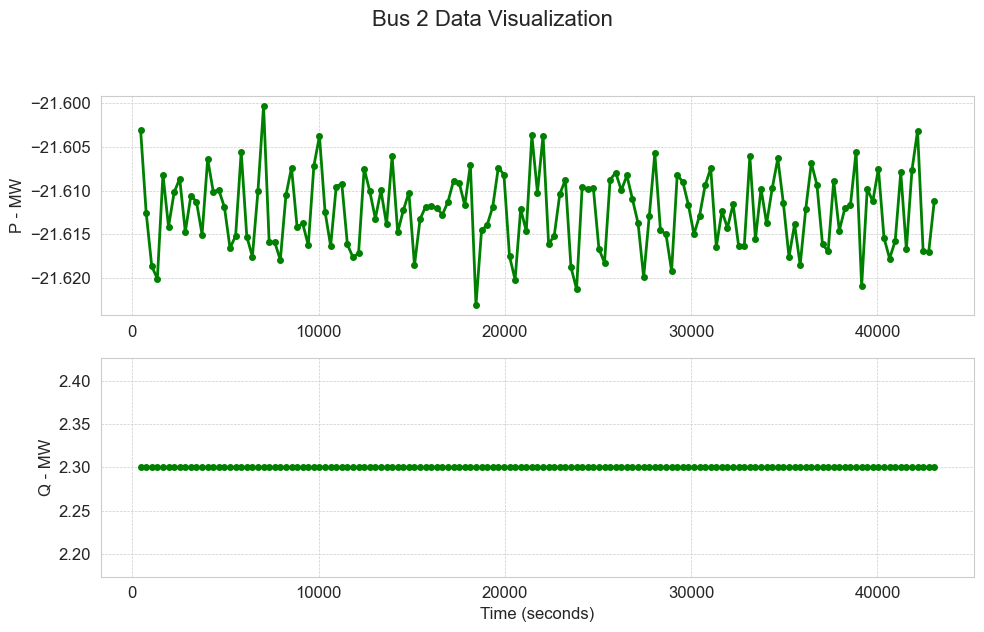

In [25]:
wec_grid.psseObj.plot_bus(bus_num=2, time=[1, time])

In [26]:
# recall viz to walk through simulation 
wec_grid.psseObj.viz()

In [1]:
"""
Testing pyPSA functionality for SoftwareX Paper
Imports 
"""
from WecGrid import WecGrid

# Instantiate the class
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE14_v32.raw")


wec_grid.initialize_pypsa("fnsl")
wec_grid.create_wec(ID=11, model="RM3", bus_location=2) 


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/23/2025 16:09:51'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.085973 seconds


pyPSA initialized
PyPSA initialized with case file: IEEE14_v32.raw.


In [2]:
wec_grid.pypsaObj.dataframe

,Bus,Pd,Qd,Gs,Bs,area,v_mag_pu_set,v_ang_set,v_nom,zone,v_mag_pu_max,v_mag_pu_min,control,type,x,y,carrier,unit,sub_network,generator
0,1,0.0,0.0,0.0,0.0,1.0,1.03000,0.0000,69.0,1.0,1.1,0.9,Slack,3,0.0,0.0,AC,None,0,G0
1,2,21.7,12.7,0.0,0.0,1.0,1.03000,-1.6041,69.0,1.0,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G1
2,3,50.0,25.0,0.0,0.0,1.0,1.01000,-3.4461,69.0,1.0,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G2
3,4,47.8,10.0,0.0,0.0,1.0,0.99869,-4.2838,69.0,1.0,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
4,5,7.6,1.6,0.0,0.0,1.0,1.00424,-3.6859,69.0,1.0,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
5,6,15.0,7.5,0.0,0.0,2.0,1.03000,-6.3321,138.0,2.0,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G3
6,7,0.0,0.0,0.0,0.0,2.0,1.00471,-4.8228,138.0,2.0,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
7,8,0.0,0.0,0.0,0.0,2.0,1.03000,-1.3752,69.0,2.0,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G4
8,9,29.5,16.6,0.0,19.0,2.0,1.00035,-7.3005,138.0,2.0,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
9,10,9.0,5.8,0.0,0.0,2.0,0.99237,-7.4604,138.0,2.0,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN


In [3]:
wec_grid.pypsaObj.viz()

In [6]:
wec_grid.pypsaObj.ac_injection(start=0, end=(450))

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/23/2025 16:09:51'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.025992 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/23/2025 16:09:51'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.033990 seconds


In [4]:
network = wec_grid.pypsaObj.pypsa_object
bus = 2
pg  = 1.0
# vs = 1.0

# network.generators.loc[network.generators.bus == str(bus), "v_set_pu"] = vs


# network.generators.loc[network.generators.bus == str(bus), "p_set_pu"] = pg

In [6]:
generator_row = network.generators.loc[network.generators.bus == str(bus)]
generator_name = generator_row.index[0]
generator_name

'G1'

In [7]:
network.generators.loc[generator_name, "p_set"] = pg

In [5]:
network.buses

,Pd,Qd,Gs,Bs,area,v_mag_pu_set,v_ang_set,v_nom,zone,v_mag_pu_max,v_mag_pu_min,control,type,x,y,carrier,unit,sub_network,generator
Bus,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,1.03000,0.0000,69.0,1.0,1.1,0.9,Slack,,0.0,0.0,AC,None,0,G0
2,21.7,12.7,0.0,0.0,1.0,1.03000,-1.6041,69.0,1.0,1.1,0.9,PV,,0.0,0.0,AC,None,0,G1
3,50.0,25.0,0.0,0.0,1.0,1.01000,-3.4461,69.0,1.0,1.1,0.9,PV,,0.0,0.0,AC,None,0,G2
4,47.8,10.0,0.0,0.0,1.0,0.99869,-4.2838,69.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
5,7.6,1.6,0.0,0.0,1.0,1.00424,-3.6859,69.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
6,15.0,7.5,0.0,0.0,2.0,1.03000,-6.3321,138.0,2.0,1.1,0.9,PV,,0.0,0.0,AC,None,0,G3
7,0.0,0.0,0.0,0.0,2.0,1.00471,-4.8228,138.0,2.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
8,0.0,0.0,0.0,0.0,2.0,1.03000,-1.3752,69.0,2.0,1.1,0.9,PV,,0.0,0.0,AC,None,0,G4
9,29.5,16.6,0.0,19.0,2.0,1.00035,-7.3005,138.0,2.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN


In [23]:
network.components

{'Network': {'list_name': 'networks',
  'description': 'Container for all components and functions which act upon the whole network.',
  'type': nan,
  'attrs':                                                          type     unit  \
  attribute                                                                
  name                                                   string      NaN   
  snapshots                                list or pandas.Index      NaN   
  snapshot_weightings                          pandas.DataFrame   hours    
  investment_periods                               pandas.Index    years   
  investment_period_weightings                 pandas.DataFrame      NaN   
  now                                                       any      NaN   
  srid                                                  integer      NaN   
  buses                                        pandas.DataFrame      NaN   
  buses_t                       dictionary of pandas.DataFrames      NaN   
  lin

In [33]:
print(network.all_components)

{'LineType', 'Transformer', 'Link', 'Carrier', 'Store', 'StorageUnit', 'SubNetwork', 'TransformerType', 'Generator', 'Bus', 'ShuntImpedance', 'Load', 'GlobalConstraint', 'Line'}


In [34]:
network.df("Bus")

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 1,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 2,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,


In [35]:
network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 1,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,
My bus 2,20.0,,0.0,0.0,AC,None,1.0,0.0,inf,PQ,


In [25]:
import pypsa
import numpy as np

network = pypsa.Network()

#add three buses
n_buses = 3

for i in range(n_buses):
    network.add("Bus", "My bus {}".format(i),  v_nom=20.)
    
    
#add three lines in a ring
for i in range(n_buses):
    network.add("Line", "My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%3),
                x=0.1,
                r=0.01)

#add a generator at bus 0
network.add("Generator", "My gen",
            bus="My bus 0",
            p_set=100,
            control="PQ")


#add a load at bus 1
network.add("Load", "My load",
            bus="My bus 1",
            p_set=100,
            q_set=100)

In [3]:
network.pf()

ValueError: negative row index found

In [44]:
network = wec_grid.pypsaObj.pypsa_object
network.generators.p_set

bus = 2

vs = 1.0

network.generators.loc[network.generators.bus == str(bus), "v_set_pu"] = vs

In [46]:
network.generators.loc[network.generators.bus == str(bus), "v_set_pu"]

Generator
G1    1.0
Name: v_set_pu, dtype: float64

In [6]:
dataframe = wec_grid.pypsaObj.pypsa_history.get(-1,None)
dataframe

,index,Bus,Pd,Qd,Gs,Bs,area,v_mag_pu_set,v_ang_set,v_nom,...,v_mag_pu_max,v_mag_pu_min,control,type,x,y,carrier,unit,sub_network,generator
0,0,1,0.0,0.0,0.0,120.0,1.0,1.00000,0.0000,138.0,...,1.1,0.9,Slack,3,0.0,0.0,AC,None,0,G0
1,1,2,97.0,20.0,0.0,0.0,1.0,1.00000,0.0102,138.0,...,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G1
2,2,3,90.0,19.0,0.0,0.0,1.0,0.86395,10.7472,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
3,3,4,74.0,15.0,0.0,0.0,1.0,0.88721,-0.4167,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
4,4,5,71.0,14.0,0.0,0.0,1.0,0.92693,-0.2237,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
5,5,6,68.0,14.0,0.0,100.0,1.0,0.90837,0.3902,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
6,6,7,62.0,13.0,0.0,0.0,1.0,1.00000,-0.5811,138.0,...,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G2
7,7,8,85.0,18.0,0.0,0.0,1.0,0.80581,-0.8692,230.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
8,8,9,175.0,36.0,0.0,0.0,1.0,0.83528,4.9829,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
9,9,10,100.0,23.0,0.0,0.0,1.0,0.88216,3.7178,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN


In [10]:
filtered_data = dataframe[dataframe["Bus"] == '1']
filtered_data

,index,Bus,Pd,Qd,Gs,Bs,area,v_mag_pu_set,v_ang_set,v_nom,...,v_mag_pu_max,v_mag_pu_min,control,type,x,y,carrier,unit,sub_network,generator
0,0,1,0.0,0.0,0.0,120.0,1.0,1.0,0.0,138.0,...,1.1,0.9,Slack,3,0.0,0.0,AC,None,0,G0


In [2]:
wec_grid.pypsaObj.dataframe

,index,Bus,Pd,Qd,Gs,Bs,area,v_mag_pu_set,v_ang_set,v_nom,...,v_mag_pu_max,v_mag_pu_min,control,type,x,y,carrier,unit,sub_network,generator
0,0,1,0.0,0.0,0.0,120.0,1.0,1.00000,0.0000,138.0,...,1.1,0.9,Slack,3,0.0,0.0,AC,None,0,G0
1,1,2,97.0,20.0,0.0,0.0,1.0,1.00000,0.0102,138.0,...,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G1
2,2,3,90.0,19.0,0.0,0.0,1.0,0.86395,10.7472,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
3,3,4,74.0,15.0,0.0,0.0,1.0,0.88721,-0.4167,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
4,4,5,71.0,14.0,0.0,0.0,1.0,0.92693,-0.2237,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
5,5,6,68.0,14.0,0.0,100.0,1.0,0.90837,0.3902,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
6,6,7,62.0,13.0,0.0,0.0,1.0,1.00000,-0.5811,138.0,...,1.1,0.9,PV,2,0.0,0.0,AC,None,0,G2
7,7,8,85.0,18.0,0.0,0.0,1.0,0.80581,-0.8692,230.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
8,8,9,175.0,36.0,0.0,0.0,1.0,0.83528,4.9829,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN
9,9,10,100.0,23.0,0.0,0.0,1.0,0.88216,3.7178,138.0,...,1.1,0.9,PQ,1,0.0,0.0,AC,None,0,NaN


In [4]:
time = wec_grid.wecObj_list[0].dataframe.time.to_list()[-1]

wec_grid.pypsaObj.ac_injection(start=0, end=(time))

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/21/2025 18:42:45'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048985 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/21/2025 18:42:45'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.035986 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/21/2025 18:42:45'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.033989 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['01/21/2025 18:42:45'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045985 seconds


In [2]:
wec_grid.pypsaObj.viz()

AttributeError: 'NoneType' object has no attribute 'viz'

In [4]:
for line in network.lines.index:
    source = network.lines.loc[line, "bus0"]
    target = network.lines.loc[line, "bus1"]
    
    print("{} -> {}".format(source, target))

NameError: name 'network' is not defined

In [5]:
dataframe = temp

In [6]:
print(dataframe.index)
dataframe.reset_index(inplace=True)
print(dataframe.index)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object', name='Bus')
RangeIndex(start=0, stop=24, step=1)


In [ ]:
dataframe.columns = ["_".join(col).strip() if isinstance(col, tuple) else col for col in dataframe.columns]

In [22]:
dataframe

,Pd,Qd,Gs,Bs,area,v_mag_pu_set,v_ang_set,v_nom,zone,v_mag_pu_max,v_mag_pu_min,control,type,x,y,carrier,unit,sub_network,generator
Bus,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,120.0,1.0,1.00000,0.0000,138.0,1.0,1.1,0.9,Slack,,0.0,0.0,AC,None,0,G0
2,97.0,20.0,0.0,0.0,1.0,1.00000,0.0102,138.0,1.0,1.1,0.9,PV,,0.0,0.0,AC,None,0,G1
3,90.0,19.0,0.0,0.0,1.0,0.86395,10.7472,138.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
4,74.0,15.0,0.0,0.0,1.0,0.88721,-0.4167,138.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
5,71.0,14.0,0.0,0.0,1.0,0.92693,-0.2237,138.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
6,68.0,14.0,0.0,100.0,1.0,0.90837,0.3902,138.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
7,62.0,13.0,0.0,0.0,1.0,1.00000,-0.5811,138.0,1.0,1.1,0.9,PV,,0.0,0.0,AC,None,0,G2
8,85.0,18.0,0.0,0.0,1.0,0.80581,-0.8692,230.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN
9,175.0,36.0,0.0,0.0,1.0,0.83528,4.9829,138.0,1.0,1.1,0.9,PQ,,0.0,0.0,AC,None,0,NaN


In [ ]:
for _, row in dataframe.iterrows():
    node_data = {
        "id": str(row["Bus"]),
        "label": str(row["Bus"]),
        "type": row["type"],
        "classes": _COLOR_MAP[row["type"]],
        "P": row["Pd"],
        "Q": row["Qd"],
        "angle": row["v_ang_set"],
    }

KeyError: 'Type'

In [9]:
network = wec_grid.pypsaObj.pypsa_object

In [12]:
for line in network.lines.index:
    source = network.lines.loc[line, "bus0"]
    target = network.lines.loc[line, "bus1"]
    
    print("{} -> {}".format(source, target))

1 -> 2
3 -> 1
1 -> 5
2 -> 4
2 -> 6
3 -> 9
4 -> 9
10 -> 6
11 -> 13
11 -> 14
12 -> 13
12 -> 23
23 -> 13
14 -> 16
16 -> 15
15 -> 21
21 -> 15
15 -> 24
16 -> 17
16 -> 19
17 -> 18
17 -> 22
18 -> 21
18 -> 21
19 -> 20
19 -> 20
20 -> 23
20 -> 23
21 -> 22
5 -> 10


In [7]:
line

'L0'

In [10]:
source

'1'

In [11]:
target

'2'

In [14]:
network

PyPSA Network
Components:
 - Bus: 24
 - Generator: 11
 - Line: 30
 - Load: 16
 - ShuntImpedance: 2
 - SubNetwork: 1
 - Transformer: 8
Snapshots: 1

'2'

In [7]:
network.lines_t

NameError: name 'network' is not defined

In [14]:
network.lines.loc[branch, "bus0"]

KeyError: "['Line'] not in index"